In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Explore the Data 
## Test Data

In [2]:
df = pd.read_csv('test_data.csv', index_col=0)

In [3]:
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
659,2,12,3000,52
276,21,7,1750,38
263,4,1,250,4
303,11,11,2750,38
83,4,12,3000,34


In [4]:
df.columns = ['MonLastDon', 'NoDon', 'TotVolDon','MonFirstDon']

In [5]:
df.head()

,MonLastDon,NoDon,TotVolDon,MonFirstDon
659,2,12,3000,52
276,21,7,1750,38
263,4,1,250,4
303,11,11,2750,38
83,4,12,3000,34


## Checking Null Values

In [6]:
df[df.MonLastDon.isnull()]

,MonLastDon,NoDon,TotVolDon,MonFirstDon


In [7]:
df[df.NoDon.isnull()]

,MonLastDon,NoDon,TotVolDon,MonFirstDon


In [8]:
df[df.TotVolDon.isnull()]

,MonLastDon,NoDon,TotVolDon,MonFirstDon


In [9]:
df[df.MonFirstDon.isnull()]

,MonLastDon,NoDon,TotVolDon,MonFirstDon


In [10]:
df.MonLastDon.value_counts()

4     48
2     39
11    31
14    18
16    16
23    15
21     8
5      5
3      4
9      3
7      3
12     2
38     2
40     1
6      1
8      1
13     1
15     1
0      1
Name: MonLastDon, dtype: int64

In [11]:
df.NoDon.value_counts()

1     44
2     33
3     21
4     15
7     14
6     11
5     10
11     8
14     7
12     6
16     6
9      5
8      4
15     4
10     3
13     2
24     2
34     1
21     1
23     1
26     1
41     1
Name: NoDon, dtype: int64

In [12]:
df.TotVolDon.value_counts()

250      44
500      33
750      21
1000     15
1750     14
1500     11
1250     10
2750      8
3500      7
4000      6
3000      6
2250      5
3750      4
2000      4
2500      3
3250      2
6000      2
5250      1
5750      1
6500      1
8500      1
10250     1
Name: TotVolDon, dtype: int64

In [13]:
df.MonFirstDon.value_counts()

4     21
11    14
38    12
14    10
16    10
26    10
52     9
23     9
64     8
35     8
28     7
58     6
2      6
29     5
33     4
77     4
34     3
76     3
86     3
40     3
41     3
31     2
42     2
21     2
98     2
46     2
79     2
48     2
88     2
57     2
62     2
71     2
81     2
93     1
9      1
87     1
15     1
82     1
19     1
22     1
95     1
78     1
47     1
75     1
70     1
32     1
65     1
50     1
39     1
49     1
27     1
Name: MonFirstDon, dtype: int64

## Histograms

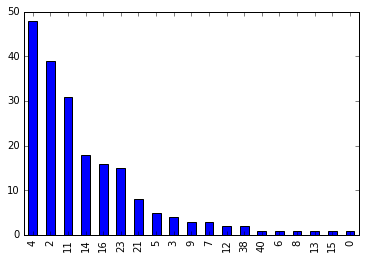

In [14]:
df.MonLastDon.value_counts().plot(kind='bar')

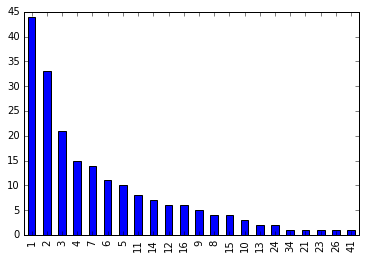

In [15]:
df.NoDon.value_counts().plot(kind='bar')

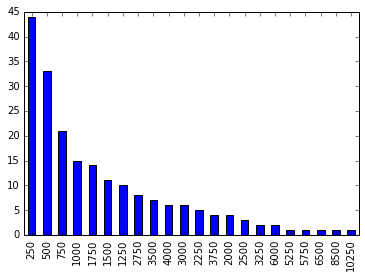

In [16]:
df.TotVolDon.value_counts().plot(kind='bar')

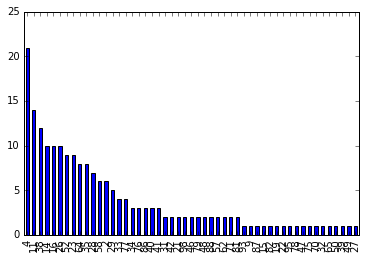

In [17]:
df.MonFirstDon.value_counts().plot(kind='bar')

## Count number of rows in the data

In [18]:
df.count()

MonLastDon     200
NoDon          200
TotVolDon      200
MonFirstDon    200
dtype: int64

## Checking Co-relation matrix of the data

In [19]:
import seaborn as sns

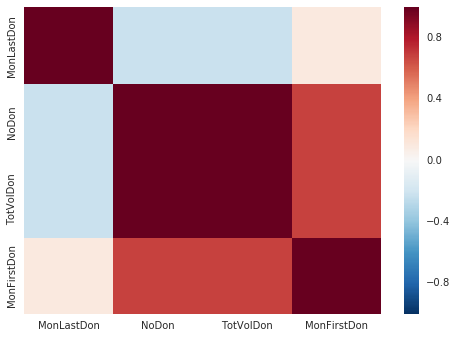

In [20]:
sns.heatmap(df.corr())

In [21]:
ratio_totno = df["TotVolDon"]/df["NoDon"]

In [22]:
ratio_totno.head()

659    250.0
276    250.0
263    250.0
303    250.0
83     250.0
dtype: float64

In [23]:
df.drop('TotVolDon', axis = 1, inplace=True)

In [24]:
df.head()

,MonLastDon,NoDon,MonFirstDon
659,2,12,52
276,21,7,38
263,4,1,4
303,11,11,38
83,4,12,34


### To increase/expand the dataset we will add new column to the dataset 

### Average Donation per Period

In [25]:
no_period_first_donation = df['MonFirstDon']/3

In [26]:
avg_don_per_period = (df['NoDon']/no_period_first_donation)

In [27]:
df.insert(3, "AveDonPerPeriod", avg_don_per_period)

In [28]:
df.head()

,MonLastDon,NoDon,MonFirstDon,AveDonPerPeriod
659,2,12,52,0.692308
276,21,7,38,0.552632
263,4,1,4,0.750000
303,11,11,38,0.868421
83,4,12,34,1.058824


### Checking Co-relation

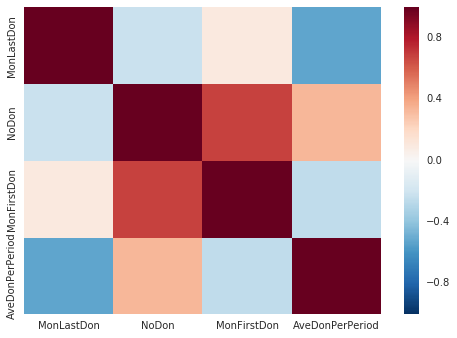

In [29]:
sns.heatmap(df.corr())